<a href="https://colab.research.google.com/github/mseoulum/AIFFEL_Quest/blob/main/DS2%EA%B8%B0_%ED%86%B5%EA%B3%84_%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B8_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# ## !pip install koreanize-matplotlib
# # import koreanize_matplotlib
# plt.rcParams['font.family'] = 'NanumGothic'
# %config InlineBackend.figure_format = 'retina'

!apt-get update -qq
!apt-get install -qq -y fonts-nanum

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)


In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

# 나눔 폰트 경로 설정
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'

# 폰트를 matplotlib에 등록
fm.fontManager.addfont(font_path)

# 폰트 속성 설정
font_name = fm.FontProperties(fname=font_path).get_name()
mpl.rc('font', family=font_name)

# 마이너스 폰트 설정
plt.rcParams['axes.unicode_minus'] = False

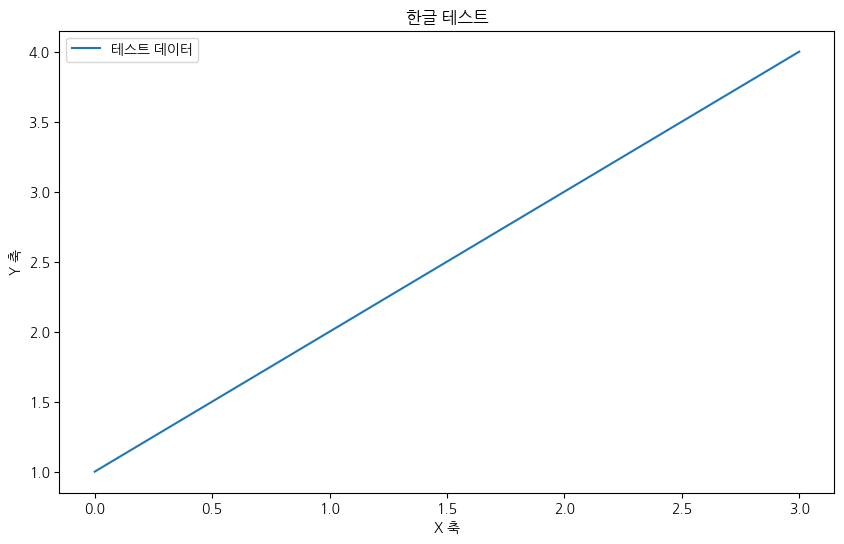

In [8]:
plt.figure(figsize=(10, 6))
plt.plot([1, 2, 3, 4], label='테스트 데이터')
plt.xlabel('X 축')
plt.ylabel('Y 축')
plt.title('한글 테스트')
plt.legend()
plt.show()

In [9]:
df = pd.read_parquet("https://github.com/corazzon/KaggleStruggle/raw/master/online-retail/data/online_retail.gzip")
df.shape

(541909, 8)

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   InvoiceNo    541909 non-null  category
 1   StockCode    541909 non-null  category
 2   Description  540455 non-null  category
 3   Quantity     541909 non-null  int32   
 4   InvoiceDate  541909 non-null  category
 5   UnitPrice    541909 non-null  float64 
 6   CustomerID   406829 non-null  float32 
 7   Country      541909 non-null  category
dtypes: category(5), float32(1), float64(1), int32(1)
memory usage: 15.1 MB


In [12]:
# 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month
df["Country"] = df["Country"].astype(str)
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


In [13]:
# 이상치 처리: TotalPrice의 이상치 제거
Q1 = df["TotalPrice"].quantile(0.25)
Q3 = df["TotalPrice"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df["TotalPrice"] >= lower_bound) & (df["TotalPrice"] <= upper_bound)]

df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34


## 미션 1) 모집단과 표본 추출을 하고 TotalPrice에 대해 비교해 주세요.
데이터셋에서 무작위로 1000개의 표본을 추출하고, 추출된 표본과 전체 데이터셋의 'TotalPrice'에 대해 평균과 표준편차를 비교하세요. \
이를 통해 모집단과 표본의 차이를 설명하고, 중심극한정리가 어떻게 적용되는지 설명하세요.

- pandas 의 sample 을 활용할 수 있으며, pandas 의 기술 통계 기능을 활용해 볼 수 있습니다.

아래의 코드를 활용하세요.

```python
# 주문 날짜 데이터 전처리
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# 데이터 타입 변경
df["Country"] = df["Country"].astype(str)

# 주문 가격
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
df.head()
```

In [14]:
# # 주문 날짜 데이터 전처리
# df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"].astype(str))
# df["InvoiceMonth"] = df["InvoiceDate"].dt.month

# # 데이터 타입 변경
# df["Country"] = df["Country"].astype(str)

# # 주문 가격
# df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]
# df.info()

In [15]:
# 모집단 TotalPrice에 대한 평균과 표준편차
population_mean = df["TotalPrice"].mean()
population_std = df["TotalPrice"].std()

# 무작위 표본 1000개 추출
sample_df = df.sample(n=1000, random_state=1)

# 표본의 TotalPrice에 대한 평균과 표준편차
sample_mean = sample_df["TotalPrice"].mean()
sample_std = sample_df["TotalPrice"].std()

# 결과 출력
print("모집단 평균:", population_mean)
print("모집단 표준편차:", population_std)
print("표본 평균:", sample_mean)
print("표본 표준편차:", sample_std)

모집단 평균: 10.17879868870142
모집단 표준편차: 8.53365258897187
표본 평균: 10.17004
표본 표준편차: 8.610733088577462


[모집단과 표본의 차이]
* 평균: 큰 차이가 없음 = 표본이 모집단을 잘 대표하고 있다고 볼 수 있음
* 표준편차: 큰 차이가 없음 = 표본이 모집단의 변동성 잘 반영하고 있다고 볼 수 있음

**> 표본이 모집단의 대표성을 가진다고 볼 수 있음**

[중심극한정리 적용]
* 표본의 크기가 커질수록 표본 평균의 분포는 정규 분포에 근접
* 표본 평균의 기대값은 모집단의 평균과 같아짐
* 표본 크기에 따라 표본 평균의 분포가 정밀해짐

**> 모집단의 평균과 표본의 평균이 매우 유사하게 나타났음. 중심극한정리를 통해 모집단에서 무작위로 추출한 표본이 모집단의 특성을 잘 반영하고 있음 확인**



## 미션2) 'Country' 변수를 바탕으로 가장 빈도가 높은 두 개의 국가를 선택하고, 각 국가의 'TotalPrice' 평균에 차이가 있는지 검증하세요. 독립표본 t-검정을 사용하여 가설을 설정하고 검정하며, 1종 오류와 2종 오류에 대해 설명하세요.


* 미션 진행 방법
    <br>1) 데이터 로드 후 'TotalPrice'와 'Country' 컬럼을 찾아주세요.
    <br>2) 데이터셋에서 주문이 가장 많은 상위 두 국가를 찾아주세요.
    <br>3) 통계적 검증 수행하기
    <br>4) 각 국가의 'TotalPrice' 평균을 계산하세요.
    <br>5) 독립표본 t-검정을 사용하여 두 국가 간 'TotalPrice' 평균의 차이가 통계적으로 유의미한지 검증하세요. 이 때, scipy.stats 라이브러리의 ttest_ind 함수를 사용할 수 있습니다. equal_var=False 파라미터를 설정하여 두 집단의 분산이 다르다고 가정하세요.
    <br>6) t-통계량과 p-값을 해석하여 결과를 설명하세요. 1종 오류와 2종 오류의 개념을 설명하고, 해당 데이터셋에 적용하여 설명해 주세요.

In [16]:
# 1. 'TotalPrice'와 'Country' 컬럼 선택
df_totalprice_country = df[['TotalPrice', 'Country']]
df_totalprice_country.head()

,TotalPrice,Country
0,15.30,United Kingdom
1,20.34,United Kingdom
2,22.00,United Kingdom
3,20.34,United Kingdom
4,20.34,United Kingdom


In [17]:
# 2. 주문이 가장 많은 상위 두 국가 찾기
top_countries = df_totalprice_country['Country'].value_counts().nlargest(2).index.tolist()
print("상위 두 국가:", top_countries)

상위 두 국가: ['United Kingdom', 'Germany']


In [18]:
# 3. 통계적 검증 수행: 각 국가별 'TotalPrice' 데이터 분리
country1_data = df_totalprice_country[df_totalprice_country['Country'] == top_countries[0]]["TotalPrice"]
country2_data = df_totalprice_country[df_totalprice_country['Country'] == top_countries[1]]["TotalPrice"]

In [19]:
# 4. 각 국가의 'TotalPrice' 평균 계산
mean_country1 = country1_data.mean()
mean_country2 = country2_data.mean()
print(f"{top_countries[0]}의 평균 TotalPrice: {mean_country1}")
print(f"{top_countries[1]}의 평균 TotalPrice: {mean_country2}")

United Kingdom의 평균 TotalPrice: 9.717274639823405
Germany의 평균 TotalPrice: 15.697480381504285


In [20]:
from scipy import stats

# 5. 독립표본 t-검정을 사용해 두 국가 간 'TotalPrice' 평균 차이가 통계적으로 유의미한지 검증
# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(country1_data, country2_data, equal_var=False)

# 결과 출력
print(f"t-통계량: {t_stat}")
print(f"p-값: {p_value}")

t-통계량: -62.363007972677885
p-값: 0.0


[1종 오류와 2종 오류]
- 1종 오류: 실제로는 참인 귀무가설 기각하는 오류 : **p-값이 0.0이므로 1종 오류의 위험은 거의 없음**

- 2종 오류: 실제로는 거짓인 귀무가설 채택하는 오류 : **p-값이 매우 작아서 2종 오류의 위험도 없음**


[결과 해석]
- t-통계량: 두 국가 간 평균 차이가 매우 큼(-62.36)
- p-값: 두 국가 간 'TotalPrice' 평균 차이가 우연히 발생할 확률이 0에 가까움. p-값이 0.0이므로 유의수준 0.05보다 훨씬 작으며, 두 국가 간 'TotalPrice'평균차가 통계적으로 유의미함을 강하게 보여줌.

**> 두 국가의 평균 차가 우연히 발생한 것이 아닌 실제로 존재함**

## 미션 3) 주중, 주말에 따른 기술통계와 분위수 분석

'UnitPrice'의 분포를 분석하기 위해 상자수염그림과 히스토그램을 그리세요. 데이터의 분위수, 중심경향치(평균, 중간값), 변산성(표준편차, 분산)을 계산하고, 이들이 데이터 분포에 대해 설명해 주세요. \
다음의 주어진 코드를 활용해 주세요.


```python
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek


df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말
```

In [21]:
# 'InvoiceDate' 컬럼을 이용하여 주중과 주말을 구분
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['DayOfWeek'] = df['InvoiceDate'].dt.dayofweek

df.loc[df['DayOfWeek'] <= 4, "WeekEnd"] = "주중"
df.loc[df['DayOfWeek'] > 4, "WeekEnd"] = "주말"

# 주중(월요일=0, 화요일=1, ..., 금요일=4)과 주말(토요일=5, 일요일=6)으로 데이터를 분리
weekday_data = df[df['DayOfWeek'] <= 4]  # 주중
weekend_data = df[df['DayOfWeek'] > 4]   # 주말

In [22]:
# 주중과 주말의 'UnitPrice' 기술 통계
stats_weekday = weekday_data['UnitPrice'].describe()
stats_weekend = weekend_data['UnitPrice'].describe()

# 결과 출력
print("주중 기술통계:\n", stats_weekday)
print("주말 기술통계:\n", stats_weekend)

주중 기술통계:
 count    435725.000000
mean          3.184443
std           3.322381
min           0.000000
25%           1.250000
50%           2.080000
75%           4.130000
max          38.260000
Name: UnitPrice, dtype: float64
주말 기술통계:
 count    61187.000000
mean         2.701289
std          2.695269
min          0.000000
25%          1.250000
50%          1.690000
75%          3.290000
max         35.950000
Name: UnitPrice, dtype: float64


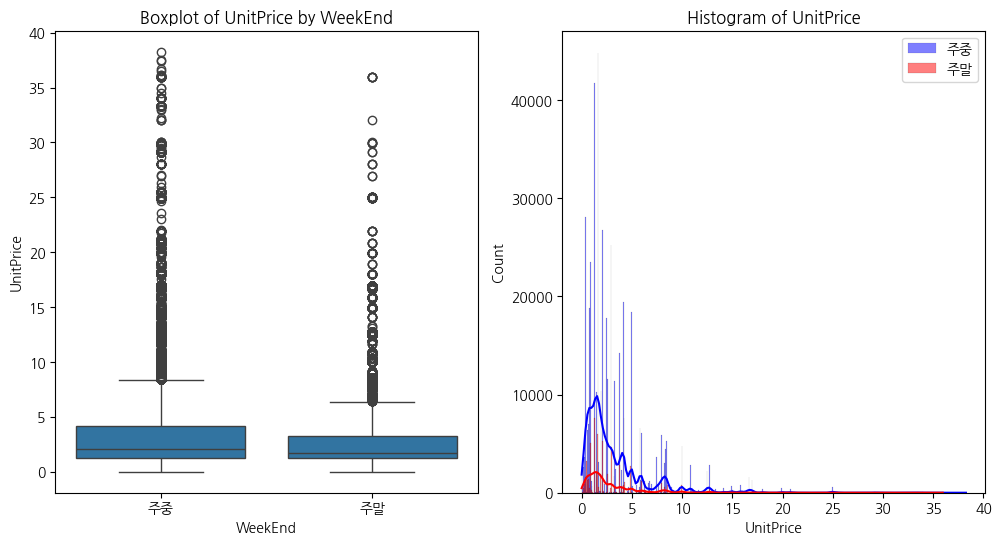

In [23]:
# 상자수염그림과 히스토그램 그리기
plt.figure(figsize=(12, 6))

# 상자수염그림
plt.subplot(1, 2, 1)
sns.boxplot(x='WeekEnd', y='UnitPrice', data=df)
plt.title('Boxplot of UnitPrice by WeekEnd')

# 히스토그램
plt.subplot(1, 2, 2)
sns.histplot(weekday_data['UnitPrice'], kde=True, color='blue', label='주중')
sns.histplot(weekend_data['UnitPrice'], kde=True, color='red', label='주말')
plt.title('Histogram of UnitPrice')
plt.legend()

plt.show()

[분위수]
- 25%: 주중과 주말 모두 1.25로 동일
- 75: 주중은 4.13, 주말은 3.29로 주중의 상위25%값이 주말보다 큼

[중심경향치(평균과 중간값)]
- 평균: 주중 3.18, 주말 2.70 = 주중의 상품단가가 주말보다 약간 더 높은 경향이 있음
- 중간: 주중 2.08, 주말 1.69 = 주중 중앙값이 주말보다 높아 주중의 UnitPrice가 주말보다 중앙값 기준으로도 더 높음

[변산성(표준편차와 분산)]
- 표준편차: 주중 3.32, 주말 2.70 = 주중의 데이터가 주말보다 더 넓게 퍼져있음
- 분산: 주중의 변동성이 주말보다 큼

[BoxPlot]
- 주중과 주말 모두 많은 이상치가 보임 = 일부 상품의 가격이 매우 높음
- 주중의 상자가 주말보다 위쪽 = 주중이 전반적으로 UnitPrice 더 높음

[Histogram]
- 주중과 주말 모두 왼쪽으로 치우쳐있으며, 대부분의 상품이 저렴한 가격대
- 주중 데이터가 주말보다 넓게 분산, 높은 가격대 상품도 상대적으로 많음

[결론]
- 주중 상품 단가가 주말보다 전반적으로 더 높고 변동성도 큼
- 주중의 상위 25% 값이 주말보다 높음
- 주중 UnitPrice 분포가 주말보다 높고 넓게 퍼져있음

In [24]:
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


## 미션4) 심슨의 역설을 설명하기 위한 구체적인 분석을 다음의 순서로 진행해 주세요.

심슨의 역설(Simpson's Paradox)은 통계 데이터를 해석할 때 발생할 수 있는 현상으로, 일부 하위 그룹에서 관찰된 추세가 전체 데이터를 합쳤을 때 반전될 수 있음을 나타냅니다. 이 현상은 복잡한 데이터에서 하위 그룹 간에 상이한 분포나 크기 때문에 발생할 수 있습니다.

심슨의 역설을 설명하기 위해서는, 데이터 내에서 서로 상반된 추세를 보이는 하위 그룹을 찾거나 생성해야 합니다. 예를 들어, 특정 상품의 판매량이나 단가가 국가별로 다른 추세를 보이는지, 혹은 특정 기간 동안의 판매 추세가 전체 기간 동안의 추세와 다른지 등을 분석할 수 있습니다.

데이터를 제시한 특정 국가로 하위 그룹으로 나눕니다.
각 하위 그룹에서 총 판매금액의 추세를 분석합니다.
전체 데이터셋에 대해 동일한 지표를 분석합니다.
하위 그룹의 추세와 전체 데이터의 추세가 서로 다른 방향성을 보일 경우, 이를 통해 심슨의 역설을 설명합니다.
이러한 분석을 위해, 데이터 내에서 적절한 변수와 하위 그룹을 선정하는 것이 중요합니다. 현재 제공된 데이터만으로는 심슨의 역설을 바로 설명할 수 있는 명확한 예시를 찾기 어려울 수 있지만, 데이터를 깊이 분석하면 관련 현상을 발견할 수도 있습니다.
이를 이용해 비즈니스에 어떻게 활용할 수 있을지도 설명해 주세요.

```python
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
```

In [25]:
# 특정 국가로 그룹화
country_group = ["Japan", "Hong Kong", "Singapore", "Lebanon", "Canada", "USA"]
grouped_df = df[df['Country'].isin(country_group)]

# 각 국가의 총 판매금액 추세 분석
grouped_stats = grouped_df.groupby('Country')['TotalPrice'].describe()
grouped_stats

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,142.0,15.554366,5.926745,2.50,10.500,15.15,19.80,30.00
Hong Kong,191.0,18.822723,7.939774,-10.95,13.200,17.70,23.40,37.50
Japan,135.0,7.445926,12.042307,-17.55,0.420,2.25,16.15,34.80
Lebanon,28.0,20.826071,8.094863,10.20,15.225,17.55,26.55,35.70
Singapore,112.0,19.016964,7.824600,2.34,15.000,17.70,23.80,37.80
USA,247.0,6.912146,15.398348,-17.40,-10.200,12.48,17.40,38.25


In [26]:
# 전체 데이터 추세 분석
overall_stats = df['TotalPrice'].describe()
overall_stats

count    496912.000000
mean         10.178799
std           8.533653
min         -17.550000
25%           3.300000
50%           8.260000
75%          15.790000
max          38.350000
Name: TotalPrice, dtype: float64

[심슨의 역설 발생 적용]

*하위 그룹의 추세
- 각 국가의 'TotalPrice' 평균을 보면, Lebanon의 경우 평균 20.82로 전체 데이터셋 평균(10.17)보다 훨씬 높음
- Japan과 USA는 전체 평균보다 낮음

**> 하위 그룹별로 매우 다른 추세를 보임**

[비즈니스 활용 방안]
- 세분화된 마케팅 전략: 국가별 'TotalPrice' 평균이 다르므로 맞춤형 판매 전략 수립
- 가격 책정 전략: 국가별 평균 단가차 고려해 가격 책정
- 제품 포트폴리오 조정: 국가별 인기 상품군 분석, 적합제품 집중 공급, 가격민감도에 따른 저렴한 상품 공급 증량
- 고객 맞춤형 프로모션: 국가별 구매패턴 분석을 통한 맞춤형 프로모션





## 미션5) 상품의 단가와 총 판매액의 관계를 분석해 주세요.

상품의 단가가 총 판매액에 미치는 영향을 이해하고 예측하는 것입니다. 이 분석은 가격 결정 전략을 개선하고, 수익성을 최대화하기 위해 사용될 수 있습니다.
높은 단가의 상품이 더 많은 총 판매액을 생성할 것이라는 가설을 설정합니다.

1) 데이터 전처리: 필요한 데이터를 정리하고, 결측치를 제거합니다.\
2) 단순 회귀분석: 단가(UnitPrice)를 독립변수로, 총 판매액(TotalPrice)을 종속변수로 설정하여 회귀분석을 수행합니다.\
3) 결과 해석: 회귀계수와 결정계수를 분석하여 상품 가격과 총 판매액 사이의 관계를 해석합니다.

In [27]:
# 1.데이터 전처리
# 결측치 제거
df_clean = df.dropna(subset=["TotalPrice", "UnitPrice"])

# UnitPrice와 TotalPrice가 0보다 큰 경우만 남김
df_clean = df_clean[(df_clean["UnitPrice"] > 0) & (df_clean["TotalPrice"] > 0)]

df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceMonth,TotalPrice,DayOfWeek,WeekEnd
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,12,15.30,2,주중
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,12,22.00,2,주중
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,12,20.34,2,주중


In [28]:
# 2. 단순 회귀분석
# 독립변수와 종속변수 설정
X = df_clean[['UnitPrice']]
y = df_clean['TotalPrice']

# 회귀분석 모델 생성
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# 모델 학습
model.fit(X, y)

# 회귀계수와 절편
coef = model.coef_[0]
intercept = model.intercept_

# 결정계수
r_squared = model.score(X, y)

# 결과 출력
print(f"회귀계수 (Slope): {coef}")
print(f"절편 (Intercept): {intercept}")
print(f"결정계수 (R^2): {r_squared}")

회귀계수 (Slope): 0.7885281287663619
절편 (Intercept): 8.004218974636139
결정계수 (R^2): 0.09514129167234942


[회귀분석 결과 해석]
*회귀계수: 0.78
- UnitPrice가 1단위 증가할 때 TotalPrice는 약 0.78증가함
- UniPrice와 TotalPrice 사이 양의 상관관계 성립

*절편: 8.00
- UnitPrice가 0일 때 TotalPrice는 약 8.00
- 해석하기 어려움.. 모델이 예측 직선이 y축을 만나는 지점으로 이해해야 하는지..?

*결정계수: 0.09
- UnitPrice가 TotalPrice의 변동을 약 9.51% 설명할 수 있음
- UnitPrice와 TotalPrice 사이 관계성이 강하지 않음, 다른 요인이 많을 수 있음 추측 가능

**> UnitPrice와 TotalPrice 사이에는 양의 상관관계 존재 = 단가 증가하면 총 판매액도 증가**

**> 회귀계수가 0.78로 UnitPrice가 TotalPrice에 미치는 영향이 상대적으로 작을 수 있음**

## 미션6) 여러 분은 크리스마스가 온라인 소매 판매에 미치는 영향을 평가하고, 이를 바탕으로 더 효과적인 가격 및 프로모션 전략을 개발해야 합니다.  

* 다음과 같은 비즈니스 전략을 고려하여 인과 분석을 합니다. 증거의 사다리로 데이터에서 얻을 수 있는 증거의 강도를 평가합니다. 크리스마스 관련 상품과 비관련 상품 간의 판매 차이를 분석합니다.


* 프로모션 전략
    * 크리스마스 상품 프로모션 강화하여 크리스마스 관련 상품의 판매를 증진시키기 위한 특별 프로모션을 개발합니다.
    * 대상 고객을 세분화하여 크리스마스 상품에 관심이 높은 고객 세그먼트를 식별하고, 이들을 대상으로 한 마케팅 캠페인을 실행합니다.
* 재고 및 공급망 관리
    * 재고 최적화를 통해 크리스마스 시즌에 대한 수요 예측을 바탕으로 재고 수준을 조절합니다.
    * 공급망 효율화를 통해 시즌별 수요 변화에 따라 공급망을 조정하여 비용을 최소화하고, 고객 만족도를 높입니다.
* 상품 다양화
    * 상품 포트폴리오를 확장하여 크리스마스 관련 상품뿐만 아니라, 다른 시즌 상품에도 주목하여 상품 포트폴리오를 다양화합니다

* 크리스마스 시즌 동안 프로모션과 상품 가격 전략이 판매에 미치는 영향을 분석하여, 미래의 프로모션 및 가격 전략을 최적화해야 합니다.



* 다음 주어진 코드를 활용합니다.


```python
# 2011년 이전 데이터만 사용합니다.
# 프로모션 여부와 시간에 따른 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")
```

In [29]:
# 데이터 분리
df_promotion = df[(df["InvoiceDate"] < "2011-01-01") & df["Description"].notnull()].dropna().copy()
df_promotion["IsChristmasPeriod"] = (df_promotion["InvoiceDate"] >= "2010-12-17") & (df_promotion["InvoiceDate"] <= "2010-12-24")
df_promotion["IsChristmasProduct"] = df_promotion["Description"].str.lower().str.contains("christmas")

In [30]:
# 크리스마스 관련 상품과 비관련 상품 간의 판매 차이 분석
christmas_sales = df_promotion[df_promotion["IsChristmasProduct"]]["Quantity"].sum()
non_christmas_sales = df_promotion[~df_promotion["IsChristmasProduct"]]["Quantity"].sum()

# 결과 출력
print(f"크리스마스 관련 상품 판매량: {christmas_sales}")
print(f"비관련 상품 판매량: {non_christmas_sales}")

크리스마스 관련 상품 판매량: 12269
비관련 상품 판매량: 146355


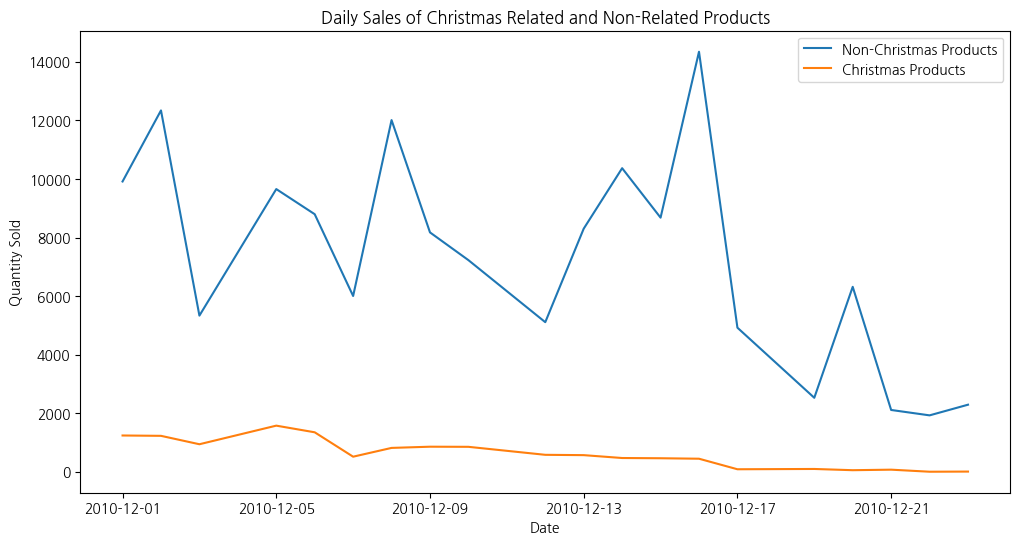

In [31]:
# 크리스마스 시즌 동안 날짜별 판매량을 계산
df_promotion['InvoiceDate'] = pd.to_datetime(df_promotion['InvoiceDate'])
df_promotion['Date'] = df_promotion['InvoiceDate'].dt.date

# 날짜별 총 판매량 계산
daily_sales = df_promotion.groupby(['Date', 'IsChristmasProduct'])['Quantity'].sum().unstack()

# 날짜별 판매량 그래프 그리기
daily_sales.plot(kind='line', figsize=(12, 6))
plt.title('Daily Sales of Christmas Related and Non-Related Products')
plt.xlabel('Date')
plt.ylabel('Quantity Sold')
plt.legend(['Non-Christmas Products', 'Christmas Products'])
plt.show()

In [32]:
from statsmodels.formula.api import ols

# 회귀분석 모델 구축
model = ols('Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion).fit()

# 회귀분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:00:59   Log-Likelihood:                -86778.
No. Observations:               23986   AIC:                         1.736e+05
Df Residuals:                   23962   BIC:                         1.738e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [33]:
# 고객 ID 기준으로 두 그룹으로 분리
customers = df_promotion['CustomerID'].dropna().unique()
np.random.shuffle(customers)
split_index = len(customers) // 2
group_A = customers[:split_index]
group_B = customers[split_index:]

# 그룹 A와 그룹 B에 대한 데이터 생성
df_promotion['Group'] = df_promotion['CustomerID'].apply(lambda x: 'A' if x in group_A else 'B' if x in group_B else np.nan)

# 그룹별 크리스마스 관련 상품 판매량 비교
group_sales = df_promotion[df_promotion['IsChristmasProduct']].groupby('Group')['Quantity'].sum()

# 결과 출력
print("그룹 A의 크리스마스 관련 상품 판매량:", group_sales['A'])
print("그룹 B의 크리스마스 관련 상품 판매량:", group_sales['B'])

그룹 A의 크리스마스 관련 상품 판매량: 5638
그룹 B의 크리스마스 관련 상품 판매량: 6631


1. 상관관계 분석
- 크리스마스 시즌 동안 시즌 관련 상품 판매량이 일정한 패턴을 보이는 반면, 비관련 상품은 변동성이 큰 것으로 확인 = 관련상품 판매는 안정적으로 유지되지만, 그 외 비관련 상품은 시기에 따른 수요 변동이 큼

2. 회귀분석
- UnitPrice의 회귀계수는 -1.08로 단가가 1증가 할 때 판매량은 1.08 감소하는 경향
- 크리스마스 관련 상품인 겨우 판매량은 약 0.89 증가하는 경향
- 독립변수들이 종속변수의 변동을 약 12.6% 설명 = 단가와 크리스마스 관련 여부 외에도 판매량에 영향을 미치는 다른 요인들이 많음 시사
- Japan, Norway 등 몇몇 국가는 통계적으로 유의미하게 판매량에 영향을 미침

3. A/B 테스트 결과
- 두 그룹 간 크리스마스 관련 상품 판매량에는 차이가 존재
- 프로모션 효과를 평가하기엔 추가 분석 필요

## 미션7) 다변량 회귀분석을 수행하여 크리스마스 기간 전후와 크리스마스 관련 상품과 비관련 상품 간의 판매량(Quantity) 차이를 'UnitPrice'와 'Country'와 함께 분석합니다.

* 판매량(Quantity)을 종속변수로 하여, 크리스마스 관련 상품 여부(IsChristmasProduct), 단가(UnitPrice), 국가(Country) 등을 독립변수로 포함하는 다변량 선형 회귀모델을 구축합니다.
* statsmodels 라이브러리(statsmodels.formula.api 의 ols)를 사용하여 모델을 구축하고, 결과를 해석합니다.
* 분석 결과를 해석하고, 이를 바탕으로 크리스마스 시즌 판매 전략에 대한 권장 사항을 제시합니다.
* 분석 과정과 결과, 그리고 비즈니스 전략에 대한 권장 사항을 포함하는 보고서를 작성합니다.
* 다음 주어진 코드를 활용합니다.

```python
from statsmodels.formula.api import ols

# ols.summary()를 이용해 볼 수 있습니다.
```

In [34]:
from statsmodels.formula.api import ols

# 다변량 회귀모델 구축
model = ols('Quantity ~ IsChristmasProduct + UnitPrice + Country', data=df_promotion).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               Quantity   R-squared:                       0.126
Model:                            OLS   Adj. R-squared:                  0.125
Method:                 Least Squares   F-statistic:                     150.6
Date:                Tue, 16 Jul 2024   Prob (F-statistic):               0.00
Time:                        08:01:06   Log-Likelihood:                -86778.
No. Observations:               23986   AIC:                         1.736e+05
Df Residuals:                   23962   BIC:                         1.738e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

[분석 결과 요약]
- R-squared 0.126 : 모델이 종속변수인 Quantity의 변동을 약 12.6% 설명
- F-통계량 150.6, p값0.00 : 모델이 통계적으로 유의미함
- Intercept 12.1784 : 기본적인 판매량 수준
- IsChristmas.. 0.8912 : 시즌 관련 상품이 판매량 증가에 긍정적 영향
- Belgium : 다른 국가보다 유의미하게 높음
- Finland: 판매량이 매우 높음
- Japan, Norway: 높은 판매량
- Netherlands: 상대적으로 낮은 판매량
- UnitPrice: 단가 1단위 증가 시 판매량은 약 1.0852 단위 감소

**> 크리스마스 관련 상품은 판매량에 긍정적인 영향을 미침**

**> 단가는 판매량에 부정적 영향을 미침**

**> 특정 국가에서 판매량이 유의미하게 높게 나타남을 확인**

[비즈니스 전략]
1. 프로모션: 크리스마스 관련 상품 프로모션을 강화하고, 타겟 마케팅을 통해 판매 증진
2. 재고 및 공급망 관리: 크리스마스 시즌 동안의 수요를 예측하고 재고 및 공급망을 최적화
3. 상품 다양화: 크리스마스 관련 상품뿐만 아니라 다른 시즌 상품에도 주목해 상품 포트폴리오 다양화하기

## 미션8) 온라인 소매 데이터를 사용하여 고객이 특정 상품을 구매할지 여부를 예측합니다.
이 예측 모델을 사용하여 타겟 마케팅 전략을 수립하고, 재고 관리를 최적화합니다. 고객의 특정 상품 구매 여부(구매/미구매)를 예측하는 이진 분류 모델을 구축합니다.


1) 타겟 변수 생성: 'WHITE HANGING HEART T-LIGHT HOLDER' 상품을 구매했는지 여부를 나타내는 이진 타겟 변수(0: 미구매, 1: 구매)를 생성합니다.\
2) 특성(feature) 선택: 구매 예측에 영향을 미칠 수 있는 변수들을 선택합니다. 예를 들어, 'UnitPrice', 'Quantity', 'CustomerID', 'Country' 등이 될 수 있습니다.\
3) 범주형 변수 처리: 'Country'와 같은 범주형 변수를 숫자로 변환합니다. 원-핫 인코딩 등을 사용할 수 있습니다.\
4) 데이터 분할: 모델 학습을 위해 데이터를 훈련 세트와 테스트 세트로 분할합니다.\
5) 로지스틱 회귀 모델 생성 및 학습합니다.\
6) 모델을 평가 합니다.

In [35]:
# 1. 타겟 변수 생성
df['IsPurchased'] = df['Description'].apply(lambda x: 1 if x == 'WHITE HANGING HEART T-LIGHT HOLDER' else 0)

In [36]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceMonth', 'TotalPrice',
       'DayOfWeek', 'WeekEnd', 'IsPurchased'],
      dtype='object')

In [37]:
# 2. 특성 선택
features = ['UnitPrice', 'Quantity', 'CustomerID'] + [col for col in df.columns if col.startswith('Country_')]

In [38]:
# 원-핫 인코딩 후 생성된 열을 포함하도록 features 리스트 업데이트
encoded_country_cols = [col for col in df.columns if col.startswith('Country_')]
features = ['UnitPrice', 'Quantity', 'CustomerID'] + encoded_country_cols

In [39]:
# 4. 선택한 특성들에 대해 결측치를 처리하고 데이터 분할
X = df[features].fillna(0)
y = df['IsPurchased'].fillna(0)

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [40]:
# 5. 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [41]:
# 6. 모델 평가
y_pred = model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     98991
         1.0       0.00      0.00      0.00       392

    accuracy                           1.00     99383
   macro avg       0.50      0.50      0.50     99383
weighted avg       0.99      1.00      0.99     99383

[[98991     0]
 [  392     0]]


### 클래스 불균형 문제 해결을 위해
- 가중치 조정: 클래스 0(미구매)에 대한 예측 성능 크게 떨어짐
- 오버샘플링: 여전히 0의 예측성능 낮음, 1 과다 예측 경향있음
- 랜덤포레스트: 0예측 성능은 우수하지만 1정밀도가 낮음
- 앙상블 학습

### 가중치 조정

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 분할
X = df[features].fillna(0)
y = df['IsPurchased'].fillna(0)  # 결측치를 0으로 채워줍니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 클래스 가중치 조정
model = LogisticRegression(class_weight='balanced', max_iter=1000)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.37      0.54     98991
         1.0       0.01      0.82      0.01       392

    accuracy                           0.37     99383
   macro avg       0.50      0.60      0.28     99383
weighted avg       0.99      0.37      0.54     99383

[[36931 62060]
 [   71   321]]


### 오버샘플링

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 분할
X = df[features].fillna(0)
y = df['IsPurchased'].fillna(0)  # 결측치를 0으로 채워줍니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# SMOTE를 사용한 오버샘플링
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 로지스틱 회귀 모델 생성 및 학습
model = LogisticRegression(max_iter=1000)
model.fit(X_train_smote, y_train_smote)

# 모델 평가
y_pred = model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.43      0.60     98991
         1.0       0.01      0.76      0.01       392

    accuracy                           0.43     99383
   macro avg       0.50      0.59      0.30     99383
weighted avg       0.99      0.43      0.59     99383

[[42153 56838]
 [   94   298]]


### 랜덤 포레스트

In [44]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 분할
X = df[features].fillna(0)
y = df['IsPurchased'].fillna(0)  # 결측치를 0으로 채워줍니다.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 랜덤포레스트 모델 생성 및 학습
model = RandomForestClassifier(class_weight='balanced', random_state=1)
model.fit(X_train, y_train)

# 모델 평가
y_pred = model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99     98991
         1.0       0.07      0.51      0.12       392

    accuracy                           0.97     99383
   macro avg       0.53      0.74      0.55     99383
weighted avg       0.99      0.97      0.98     99383

[[96268  2723]
 [  193   199]]


In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import StackingClassifier

# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# 기본 학습기 정의
base_learners = [
    ('lr', LogisticRegression(class_weight='balanced', max_iter=1000)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=1)),
    ('dt', DecisionTreeClassifier(class_weight='balanced', random_state=1))
]

# 메타 학습기 정의
meta_learner = LogisticRegression(class_weight='balanced', max_iter=1000)

# 스태킹 모델 정의
stacking_model = StackingClassifier(estimators=base_learners, final_estimator=meta_learner)

# 모델 학습
stacking_model.fit(X_train, y_train)

# 모델 평가
y_pred = stacking_model.predict(X_test)

# 평가 결과 출력
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96     98991
         1.0       0.03      0.58      0.06       392

    accuracy                           0.93     99383
   macro avg       0.51      0.76      0.51     99383
weighted avg       0.99      0.93      0.96     99383

[[91704  7287]
 [  163   229]]


In [54]:
import pandas as pd

# 각 모델의 성능 결과를 딕셔너리로 정리
results = {
    "Model": ["Weighted Logistic Regression", "SMOTE Logistic Regression", "Random Forest", "Stacking Ensemble"],
    "Precision_0": [1.00, 1.00, 1.00, 1.00],
    "Recall_0": [0.37, 0.43, 0.97, 0.93],
    "F1_0": [0.54, 0.60, 0.99, 0.96],
    "Precision_1": [0.01, 0.01, 0.07, 0.03],
    "Recall_1": [0.82, 0.76, 0.51, 0.58],
    "F1_1": [0.01, 0.01, 0.12, 0.06],
    "Accuracy": [0.37, 0.43, 0.97, 0.93]
}

# 딕셔너리를 데이터프레임으로 변환
results_df = pd.DataFrame(results)

# 데이터프레임 출력
print(results_df)

                          Model  Precision_0  Recall_0  F1_0  Precision_1  \
0  Weighted Logistic Regression          1.0      0.37  0.54         0.01   
1     SMOTE Logistic Regression          1.0      0.43  0.60         0.01   
2                 Random Forest          1.0      0.97  0.99         0.07   
3             Stacking Ensemble          1.0      0.93  0.96         0.03   

   Recall_1  F1_1  Accuracy  
0      0.82  0.01      0.37  
1      0.76  0.01      0.43  
2      0.51  0.12      0.97  
3      0.58  0.06      0.93  


- RandomForest 모델이 전체적으로 가장 좋은 성능을 보임
- Ensemble 모델은 클래스 1의 정밀도와 재현율이 RF보다 약간 낮음